In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


## Importing the dataset

In [ ]:
df=pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Feature Engineering

In [ ]:
columns=df.columns
columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [ ]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
y=df['sentiment']

## Splitting the dataset in train and test split

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)


DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


## Building deep learn model

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 116, 20)           10549420  
_________________________________________________________________
conv1d (Conv1D)              (None, 114, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           24704 

## Training the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)


Epoch 1/5
10720/10720 [==============================] - 1758s 164ms/step - loss: 0.4310 - accuracy: 0.8000 - val_loss: 0.4022 - val_accuracy: 0.8164
Epoch 2/5
10720/10720 [==============================] - 1753s 164ms/step - loss: 0.3887 - accuracy: 0.8249 - val_loss: 0.3966 - val_accuracy: 0.8191
Epoch 3/5
10720/10720 [==============================] - 1758s 164ms/step - loss: 0.3717 - accuracy: 0.8337 - val_loss: 0.3952 - val_accuracy: 0.8212
Epoch 4/5
10720/10720 [==============================] - 1757s 164ms/step - loss: 0.3590 - accuracy: 0.8403 - val_loss: 0.3988 - val_accuracy: 0.8208
Epoch 5/5
10720/10720 [==============================] - 1761s 164ms/step - loss: 0.3487 - accuracy: 0.8457 - val_loss: 0.4016 - val_accuracy: 0.8183


In [ ]:
y_pred=model.predict(data_test)
y_pred

array([[5.3057867e-01, 1.6503190e-12, 1.4737911e-12, 2.0880578e-12,
        4.6942136e-01],
       [4.3087047e-01, 4.5178608e-30, 1.8960694e-30, 9.7950818e-30,
        5.6912953e-01],
       [4.1006711e-01, 5.7825083e-32, 5.5344878e-32, 3.4352918e-30,
        5.8993286e-01],
       ...,
       [1.3010762e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.8698920e-01],
       [7.7644706e-01, 0.0000000e+00, 0.0000000e+00, 1.6368611e-38,
        2.2355296e-01],
       [8.7420261e-01, 1.4241580e-26, 1.1771427e-26, 1.5411697e-25,
        1.2579739e-01]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 4, 4, ..., 4, 0, 0])

## Scoring

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

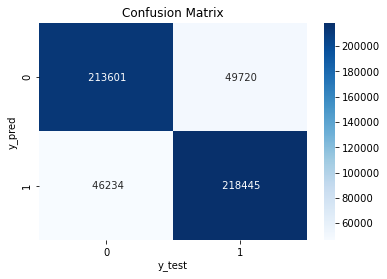

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82    263321
           4       0.81      0.83      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000

